# Thera Bank Personal Loan Campaign
 
### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

### Domain:
Banking

 

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 

### Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (\\$000)
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (\\$000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (\\$000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

 
### Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation
 

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 
### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    * Number of unique in each column?
    * Number of people with zero mortgage?
    * Number of people with zero credit card spending per month?
    * Value counts of all categorical columns.
    * Univariate and Bivariate
    * Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6. Give conclusion related to the Business understanding of your model? (5 marks)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIP Code,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
Personal Loan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


In [4]:
df.shape

(5000, 14)

Checking for numerical datatypes

In [5]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

checking for nulls in the data

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### EDA

**Number of unique in each column?**

In [7]:
vals=[]
for i in list(df.columns):
    vals.append(df[i].nunique())
val_counts_df = pd.DataFrame({'Cols': list(df.columns), 'Unique Values': vals})
val_counts_df

,Cols,Unique Values
0,ID,5000
1,Age,45
2,Experience,47
3,Income,162
4,ZIP Code,467
5,Family,4
6,CCAvg,108
7,Education,3
8,Mortgage,347
9,Personal Loan,2


**Number of people with zero mortgage?**

In [8]:
#zero mortgage
df['Mortgage'][df['Mortgage']==0].count()

3462

**Number of people with zero credit card spending per month?**

In [9]:
#zero credit spending
df['CCAvg'][df['CCAvg']==0].count()

106

**Value counts of all categorical columns.**

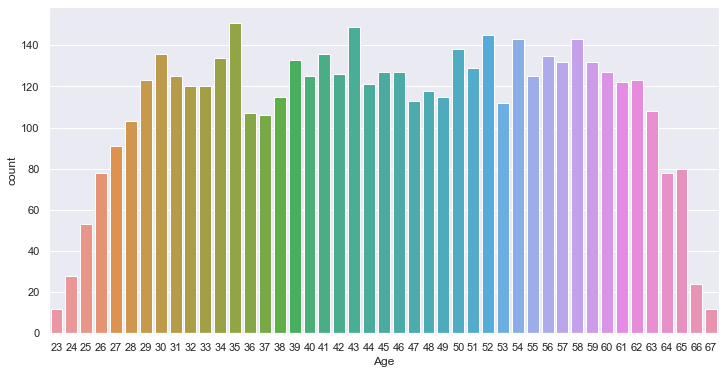

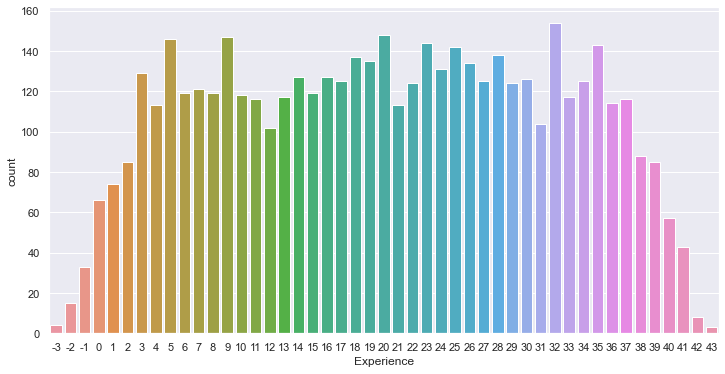

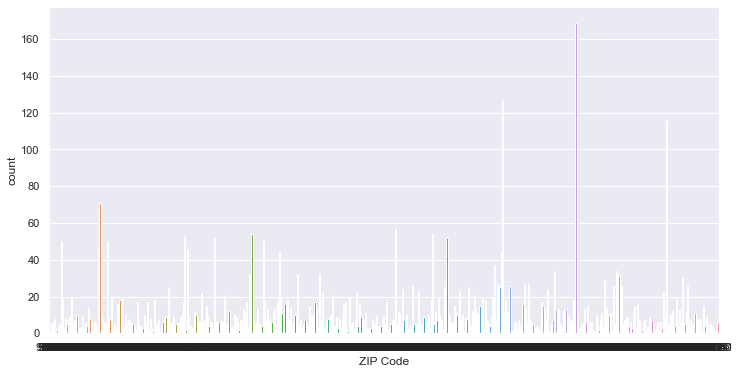

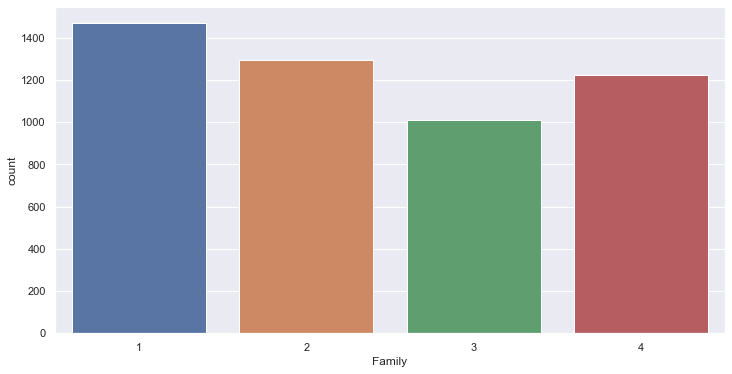

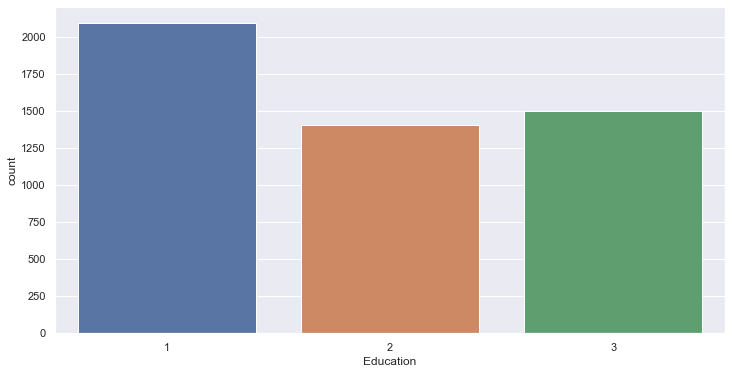

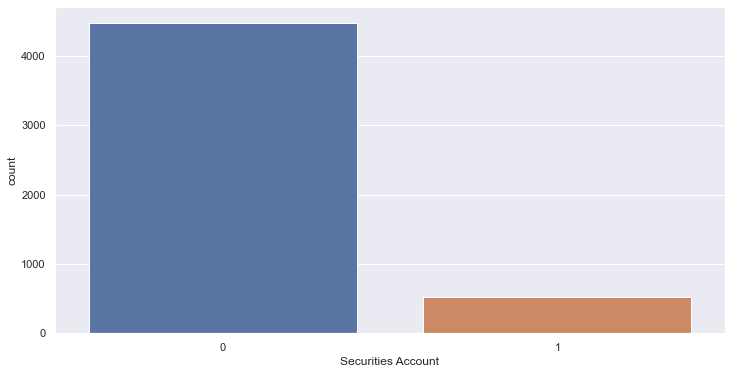

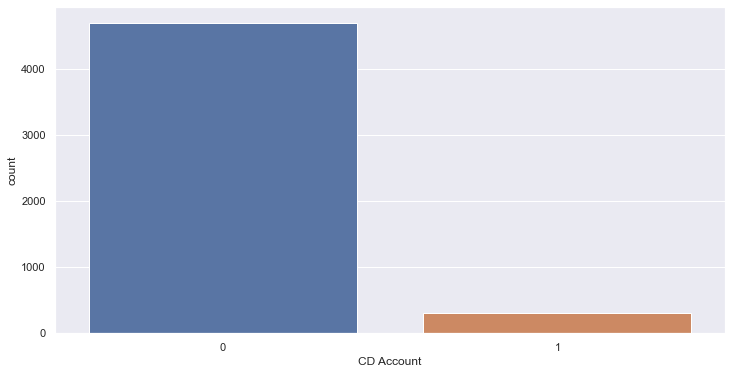

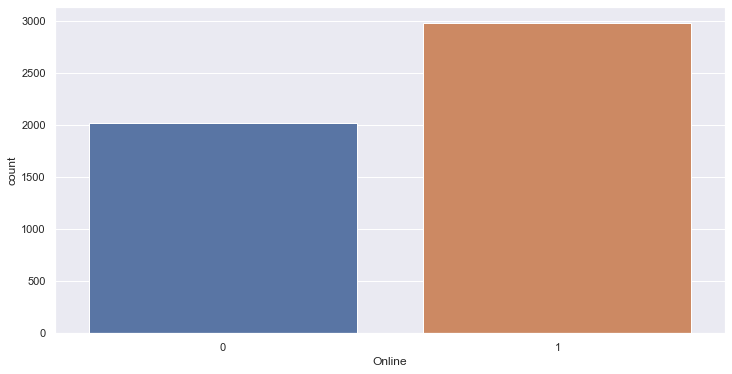

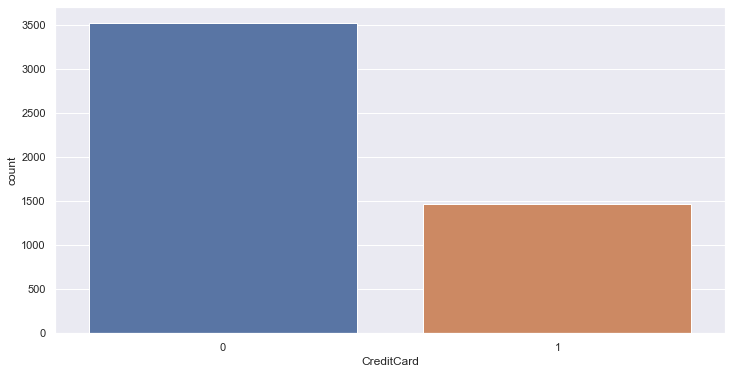

In [10]:
#created a list of the categorical variables and looped through them to view value counts for categories using countplot

cats = ['Age', 'Experience', 'ZIP Code', 'Family', 'Education', 'Securities Account','CD Account', 'Online', 'CreditCard']

for c in cats:
    plt.figure(figsize=(12, 6))
    sns.countplot(df[c])
    plt.show()


**Univariate and Bivariate**

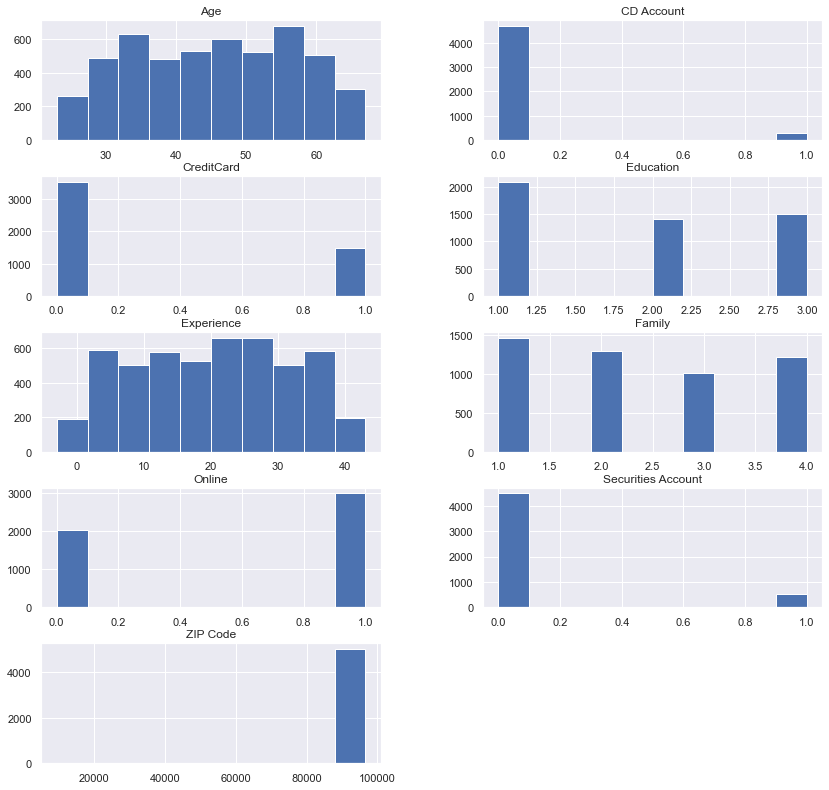

In [11]:
cats = ['Age', 'Experience', 'ZIP Code', 'Family', 'Education', 'Securities Account','CD Account', 'Online', 'CreditCard']

df[cats].hist(figsize=(14, 28), layout=(10,2))
plt.show()

* Age and Experience have fairly normal distribution.  This is good
* for the binary variables, there is some skeweness towards not having a Securities Account and for them not having a CD account with the bank.  It seems like the majority of Liability customers do not have accounts with the bank.

Looking at the distribution of the dependent variable

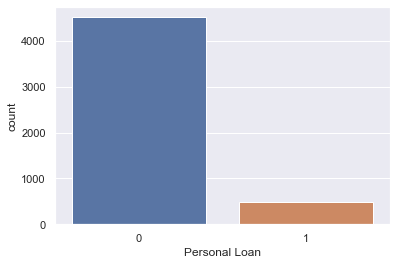

In [12]:
sns.countplot(df['Personal Loan'])
plt.show()

* most people in this sample set do not have a personal loan with the bank

Looking into the distribution of Age and Experience

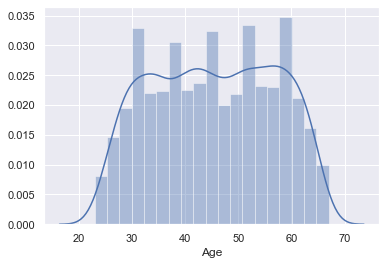

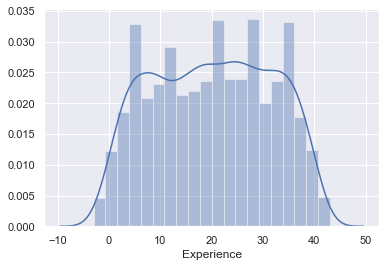

In [13]:
sns.distplot(df['Age'])
plt.show()

sns.distplot(df['Experience'])
plt.show()

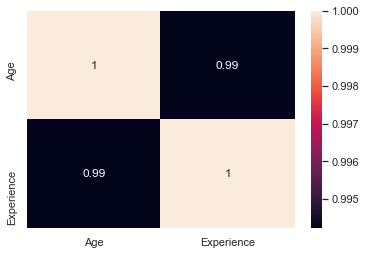

In [14]:
#heatmap to show correlation between Age and Experience

sns.heatmap(df[['Age', 'Experience']].corr(), annot=True)
plt.show()

* age and experience seem to be highly correlated.  May need to remove one of these features when running the model.

Time to look at scatterplots

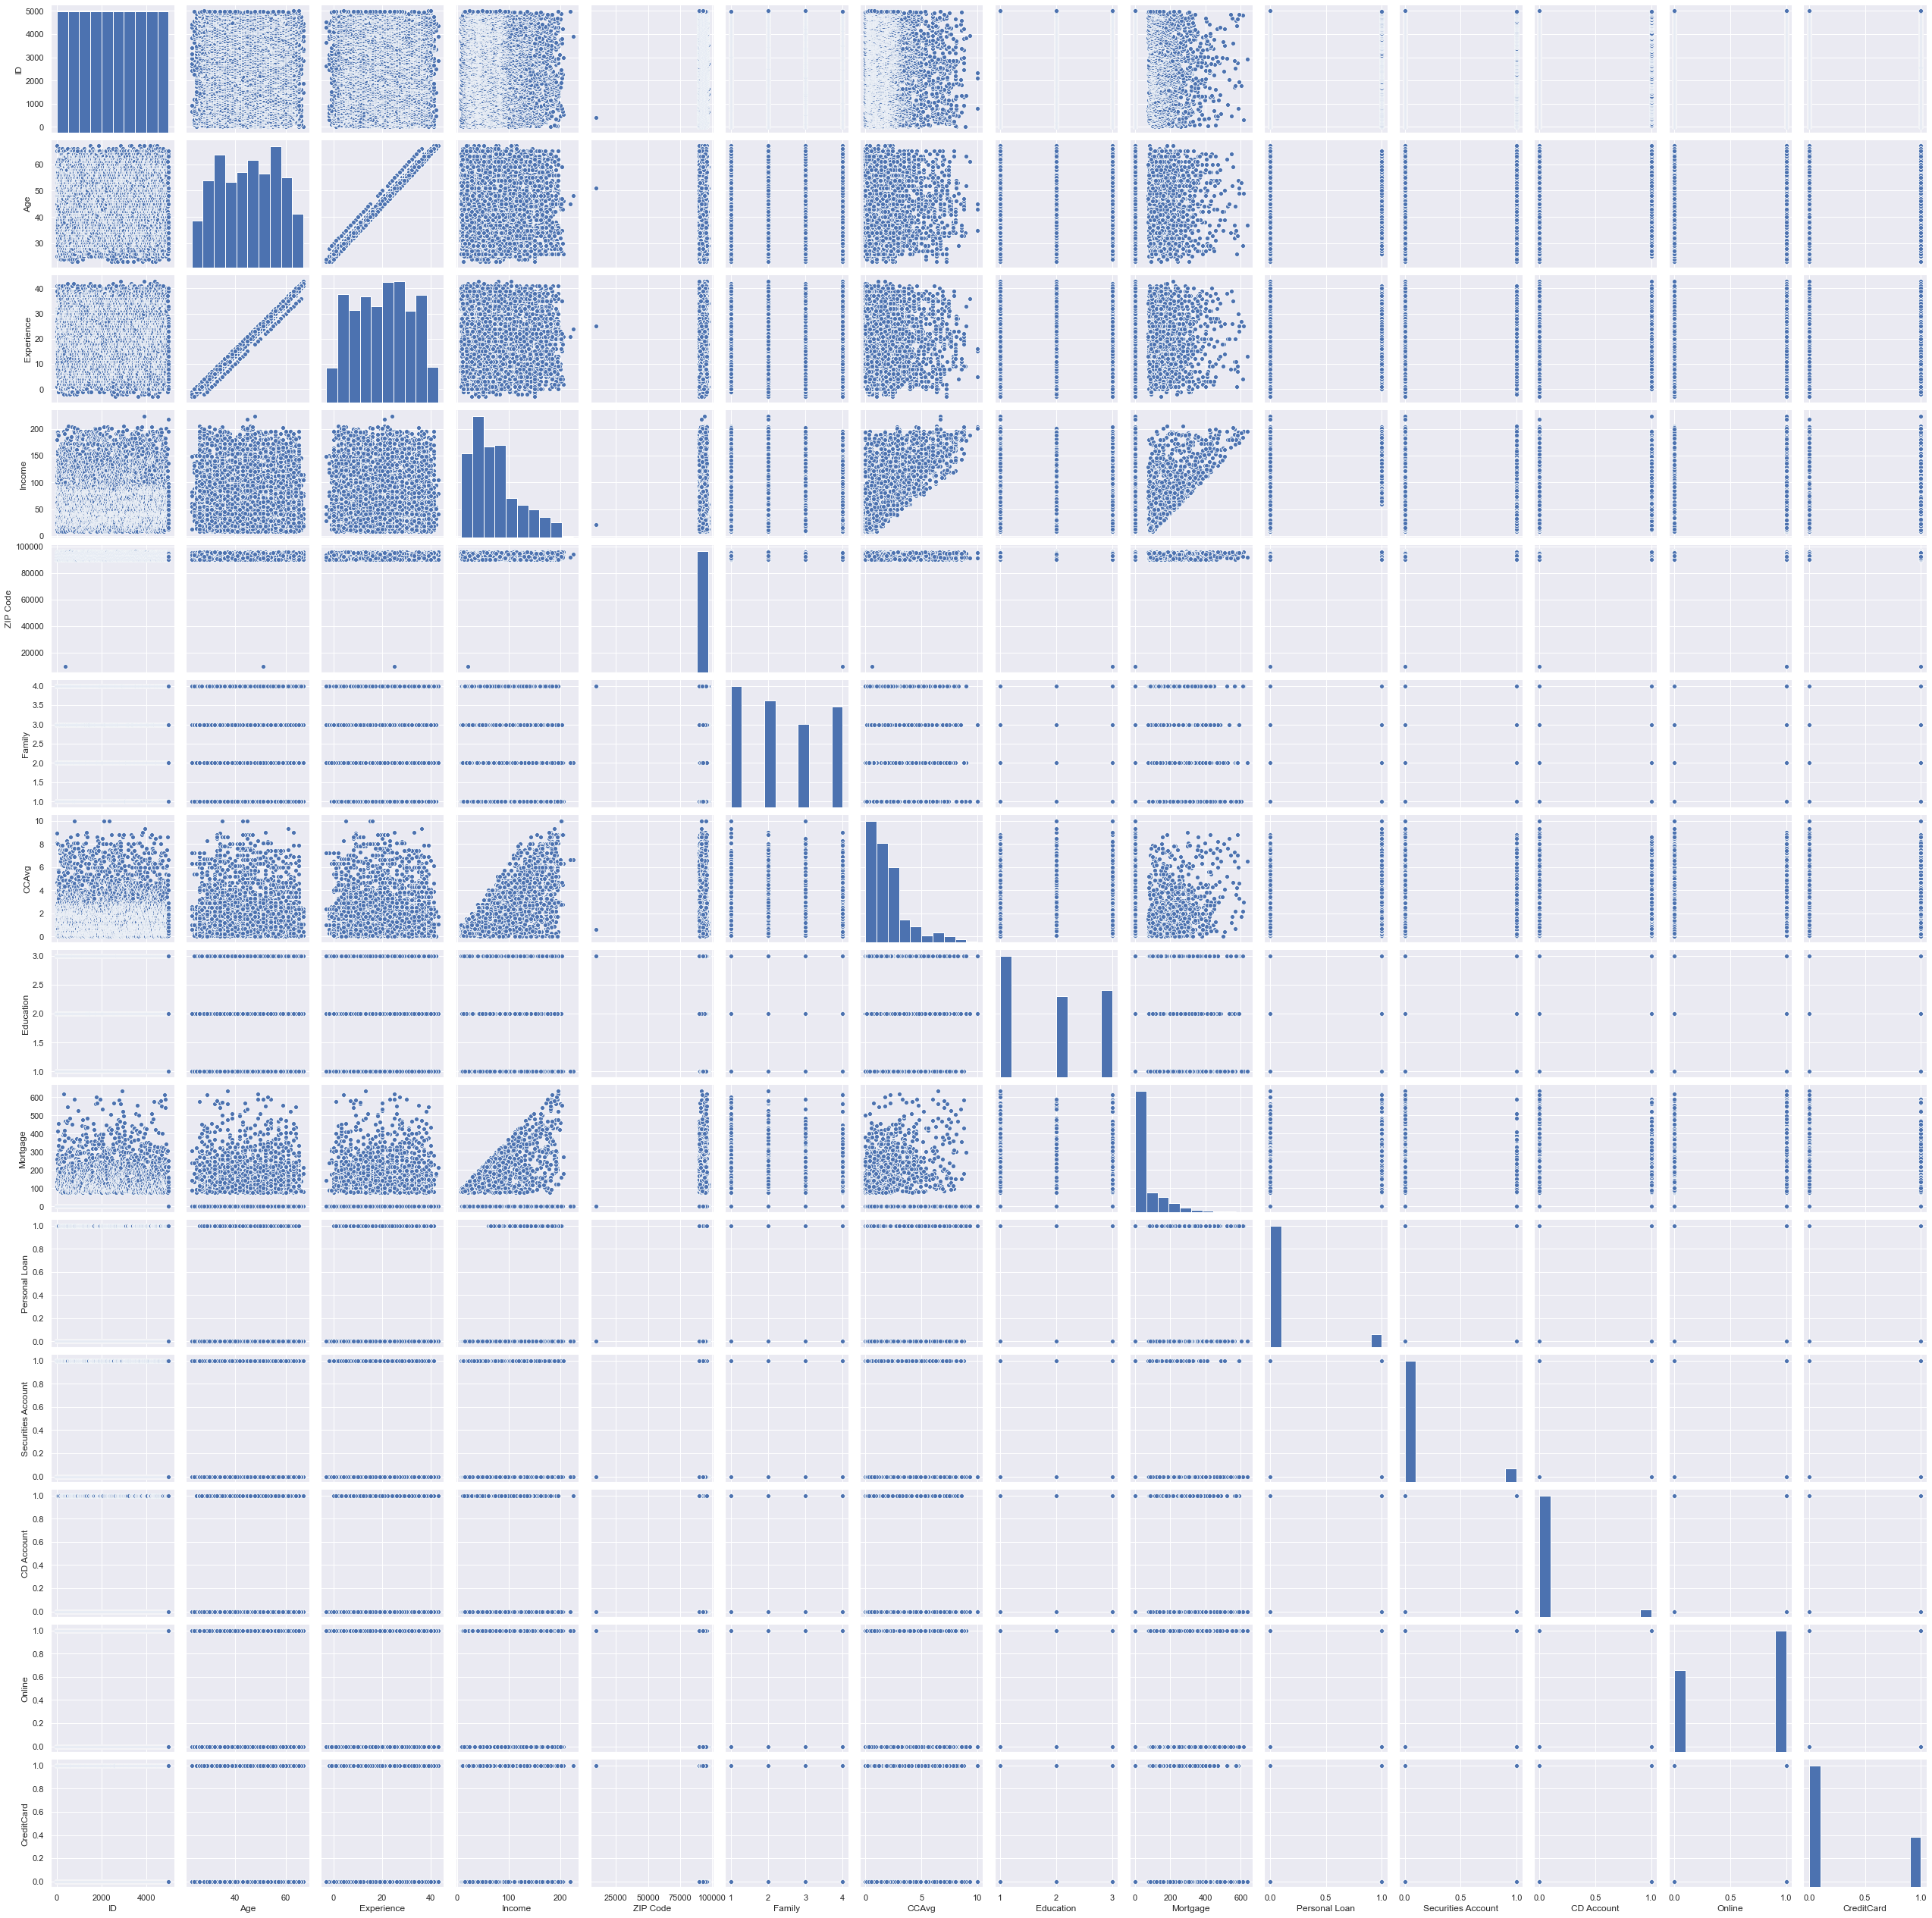

In [15]:
sns.pairplot(df)
plt.show()

* some high correlations with Income and CCAvg, Income and Mortgage

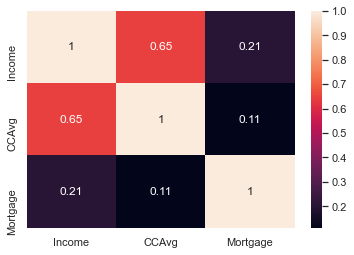

In [16]:
sns.heatmap(df[['Income', 'CCAvg', 'Mortgage']].corr(), annot=True)
plt.show()

* confirmed a decently high correlation between Income and CCAvg at 0.65

let's look at all of the features in a heatmap

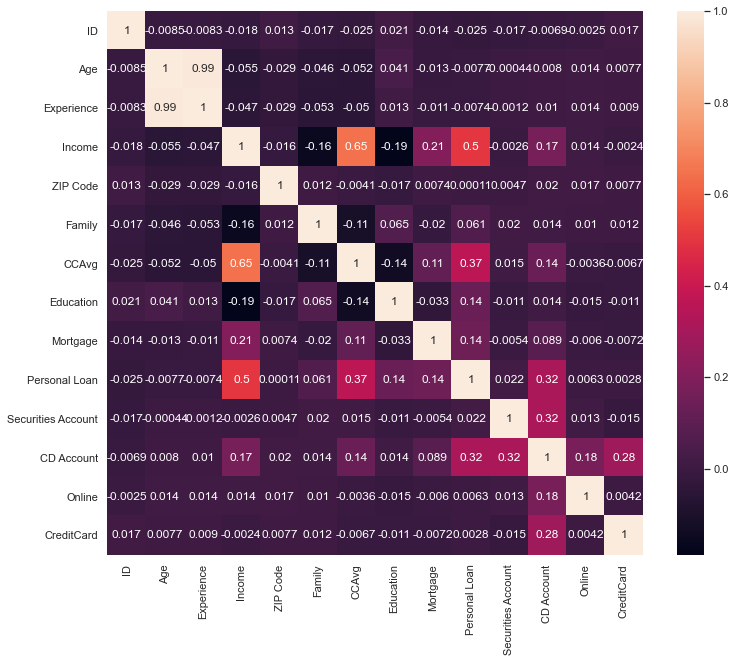

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

* the highest correlations seem to be between Income and CCAvg and even moreso in Age and Experience, as we saw before
* Income has a 0.5 correlation with Personal Loan.  This may indicated that income will be a good predictor of a person accepting a loan.

Next, we will **get data model ready**

ID field is not need. Dropping it here.

In [18]:
df.drop('ID', axis=1, inplace=True)

The rest of the data seems pretty clean to me.  The only column I would create dummy variables on would be zip code, but there are over 400 unique zip codes. I may just drop zip codes as it may just add noise to the model.

#### Splitting the data
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)


In [19]:
# creating X and y set

X = df.drop(['ZIP Code', 'Personal Loan'], axis=1)
y = df[['Personal Loan']]

In [20]:
# already imported train_test_split at the top

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [23]:
#imported all of the metrics in the start of the notebook

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

scores_list = [accuracy, precision, recall, f1, roc_auc]
mets_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC/AUC']

mets_df = pd.DataFrame({'Metrics': mets_list, 'Scores': scores_list})
mets_df

,Metrics,Scores
0,Accuracy,0.95
1,Precision,0.78
2,Recall,0.58
3,F1 Score,0.66
4,ROC/AUC,0.78


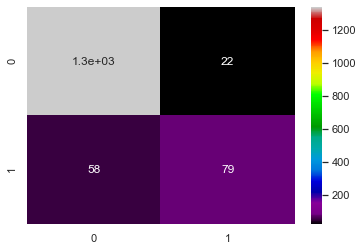

In [24]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='nipy_spectral')
plt.show()

5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [25]:
df_coef = pd.DataFrame({'Features': X_test.columns, 'Coefficients': [i for i in lr.coef_[0]]})
df_coef

,Features,Coefficients
0,Age,-0.49
1,Experience,0.49
2,Income,0.05
3,Family,0.52
4,CCAvg,0.04
5,Education,1.65
6,Mortgage,0.00
7,Securities Account,0.33
8,CD Account,2.67
9,Online,-0.29


In [26]:
prob_0 = lr.predict_proba(X_test)[:, 0]
prob_1 = lr.predict_proba(X_test)[:, 1]

df_false = pd.DataFrame({'Actual': y_test['Personal Loan'], 'Prob of 0': prob_0, 'Prob of 1': prob_1, 'Prediction': y_pred})
df_false[df_false['Actual']!= df_false['Prediction']]

,Actual,Prob of 0,Prob of 1,Prediction
3356,1,0.57,0.43,0
3403,1,0.97,0.03,0
1486,1,0.76,0.24,0
2262,1,0.89,0.11,0
2885,1,0.56,0.44,0
...,...,...,...,...
3646,1,0.57,0.43,0
4179,1,0.94,0.06,0
2385,1,0.72,0.28,0
4023,1,0.64,0.36,0


6. Give conclusion related to the Business understanding of your model? (5 marks)

* A lot of the training data is skewed towards people not having a personal loan.  As such, the predictive model also is skewed towards predicting no loan being taken
* The high accuracy, 95%, is due to the model predicting many 0's correctly.  However, precision and especially recall more accurately explain the models inefficiencies.  
* The F1 takes the precision and recall into account giving us a score of 0.66.  This is just okay, but show's we have room for improvement.  We correctly predict 79 people accepting a loan, but we incorrectly predict 22 people to accept the loan when they do not, and do not predict 58 people that did accept the loan.